In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
# 通过原有sklearn的标准化进行处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784] -> [None, 28, 28]
# 先reshape变为二维（相当于1列）的目的是对每一个像素点进行标准化（让其等价）
x_train_scaled = scaler.fit_transform(
    x_train.reshape(-1, 1)).reshape(-1, 28, 28)
# 这个是验证集，验证集用的也是训练集的均值和方差
x_valid_scaled = scaler.transform(
    x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
# 这个是测试集
x_test_scaled = scaler.transform(
    x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [5]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.023143278665243 -0.8105136544337038


In [7]:
# tf.keras.models.Sequential()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

"""
与上面的代码等价
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [8]:
history = model.fit(x_train_scaled, y_train, epochs=20, 
                    validation_data=(x_valid_scaled, y_valid))

2022-07-19 23:37:56.526265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 0.8864 - accuracy: 0.7140 - val_loss: 0.5954 - val_accuracy: 0.7972
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5638 - accuracy: 0.8065 - val_loss: 0.5086 - val_accuracy: 0.8272
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8245 - val_loss: 0.4702 - val_accuracy: 0.8382
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4689 - accuracy: 0.8359 - val_loss: 0.4487 - val_accuracy: 0.8488
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4460 - accuracy: 0.8429 - val_loss: 0.4295 - val_accuracy: 0.8524
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4283 - accuracy: 0.8488 - val_loss: 0.4177 - val_accuracy: 0.8538
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8536 - val_loss: 0.4094 - val_accuracy:

In [9]:
history.history

{'loss': [0.8863623738288879,
  0.5638380646705627,
  0.5026593208312988,
  0.46890535950660706,
  0.4459552466869354,
  0.42828574776649475,
  0.41433438658714294,
  0.40294772386550903,
  0.3932337462902069,
  0.38492706418037415,
  0.37767019867897034,
  0.3708881139755249,
  0.3646746873855591,
  0.3593166768550873,
  0.35399869084358215,
  0.34904173016548157,
  0.34437096118927,
  0.3402608633041382,
  0.3363914489746094,
  0.3324379622936249],
 'accuracy': [0.7140363454818726,
  0.8064908981323242,
  0.8245454430580139,
  0.8359090685844421,
  0.8429454565048218,
  0.848836362361908,
  0.853600025177002,
  0.8572909235954285,
  0.8606727123260498,
  0.8644727468490601,
  0.8663454651832581,
  0.8682363629341125,
  0.8714181780815125,
  0.8728727102279663,
  0.8745272755622864,
  0.876800000667572,
  0.8784545660018921,
  0.8794545531272888,
  0.8814908862113953,
  0.881600022315979],
 'val_loss': [0.5953664779663086,
  0.5086076855659485,
  0.47020038962364197,
  0.4486562609672

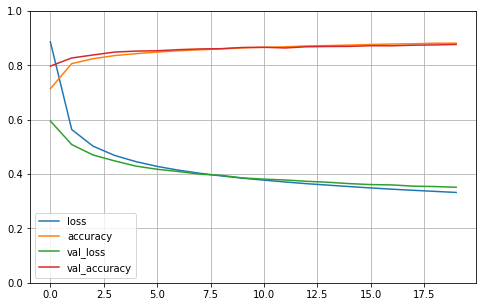

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [11]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3861204981803894, 0.8640000224113464]